In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [2]:
df=pd.read_csv("titanic-.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df=df[['PassengerId','Pclass',"Name","Sex","Age","SibSp","Parch","Ticket","Fare","Survived","Embarked"]]

#df=pd.get_dummies(df,columns=["Embarked"])
df


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Survived,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,0,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,1,C


In [6]:
df.isna().sum(axis=0)
df=df.dropna()


In [7]:
X=df[['Pclass',"Sex","Age","SibSp","Parch","Fare","Survived"]].values
X[0:5]

array([[3, 'male', 22.0, 1, 0, 7.25, 0],
       [1, 'female', 38.0, 1, 0, 71.2833, 1],
       [3, 'female', 26.0, 0, 0, 7.925, 1],
       [1, 'female', 35.0, 1, 0, 53.1, 1],
       [3, 'male', 35.0, 0, 0, 8.05, 0]], dtype=object)

In [8]:
from sklearn import preprocessing
le_sex=preprocessing.LabelEncoder()
le_sex.fit(["female","male"])
X[:,1]=le_sex.transform(X[:,1])


In [9]:
X[0:5]

array([[3, 1, 22.0, 1, 0, 7.25, 0],
       [1, 0, 38.0, 1, 0, 71.2833, 1],
       [3, 0, 26.0, 0, 0, 7.925, 1],
       [1, 0, 35.0, 1, 0, 53.1, 1],
       [3, 1, 35.0, 0, 0, 8.05, 0]], dtype=object)

In [10]:
y=df["Embarked"]
y[0:5]

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(498, 7)
(498,)
(214, 7)
(214,)


In [14]:
EmbarkedTree=DecisionTreeClassifier(criterion="entropy",max_depth=4)
EmbarkedTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [15]:
EmbarkedTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [16]:
predTree=EmbarkedTree.predict(X_test)

In [17]:
print(predTree[0:5])
print(y_test[0:5])
print(predTree.shape)
print(y_test.shape)

['C' 'S' 'S' 'S' 'S']
310    C
866    C
105    S
401    S
221    S
Name: Embarked, dtype: object
(214,)
(214,)


In [18]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Precision from Decision Trees: ",metrics.accuracy_score(y_test,predTree))

Precision from Decision Trees:  0.7336448598130841


In [19]:
from sklearn.externals.six import StringIO
#import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 


C:\Users\ivanp\anaconda3\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


In [20]:
conda install graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ivanp\anaconda3

  added / updated specs:
    - graphviz


The following packages will be UPDATED:


Note: you may need to restart the kernel to use updated packages.  ca-certificates    conda-forge::ca-certificates-2021.10.~ --> pkgs/main::ca-certificates-2021.10.26-haa95532_2

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2021.10.8-py38ha~ --> pkgs/main::certifi-2021.10.8-py38haa95532_0
  conda              conda-forge::conda-4.11.0-py38haa244f~ --> pkgs/main::conda-4.11.0-py38haa95532_0
  openssl            conda-forge::openssl-1.1.1l-h8ffe710_0 --> pkgs/main::openssl-1.1.1l-h2bbff1b_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done



In [21]:
conda install -c conda-forge pydotplus

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ivanp\anaconda3

  added / updated specs:
    - pydotplus


The following packages will be UPDATED:

  certifi            pkgs/main::certifi-2021.10.8-py38haa9~ --> conda-forge::certifi-2021.10.8-py38haa244fe_1

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2021.10.26~ --> conda-forge::ca-certificates-2021.10.8-h5b45459_0
  conda              pkgs/main::conda-4.11.0-py38haa95532_0 --> conda-forge::conda-4.11.0-py38haa244fe_0
  openssl              pkgs/main::openssl-1.1.1l-h2bbff1b_0 --> conda-forge::openssl-1.1.1l-h8ffe710_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [23]:
import pydotplus
import graphviz

AttributeError: module 'graphviz.backend' has no attribute 'ENCODING'

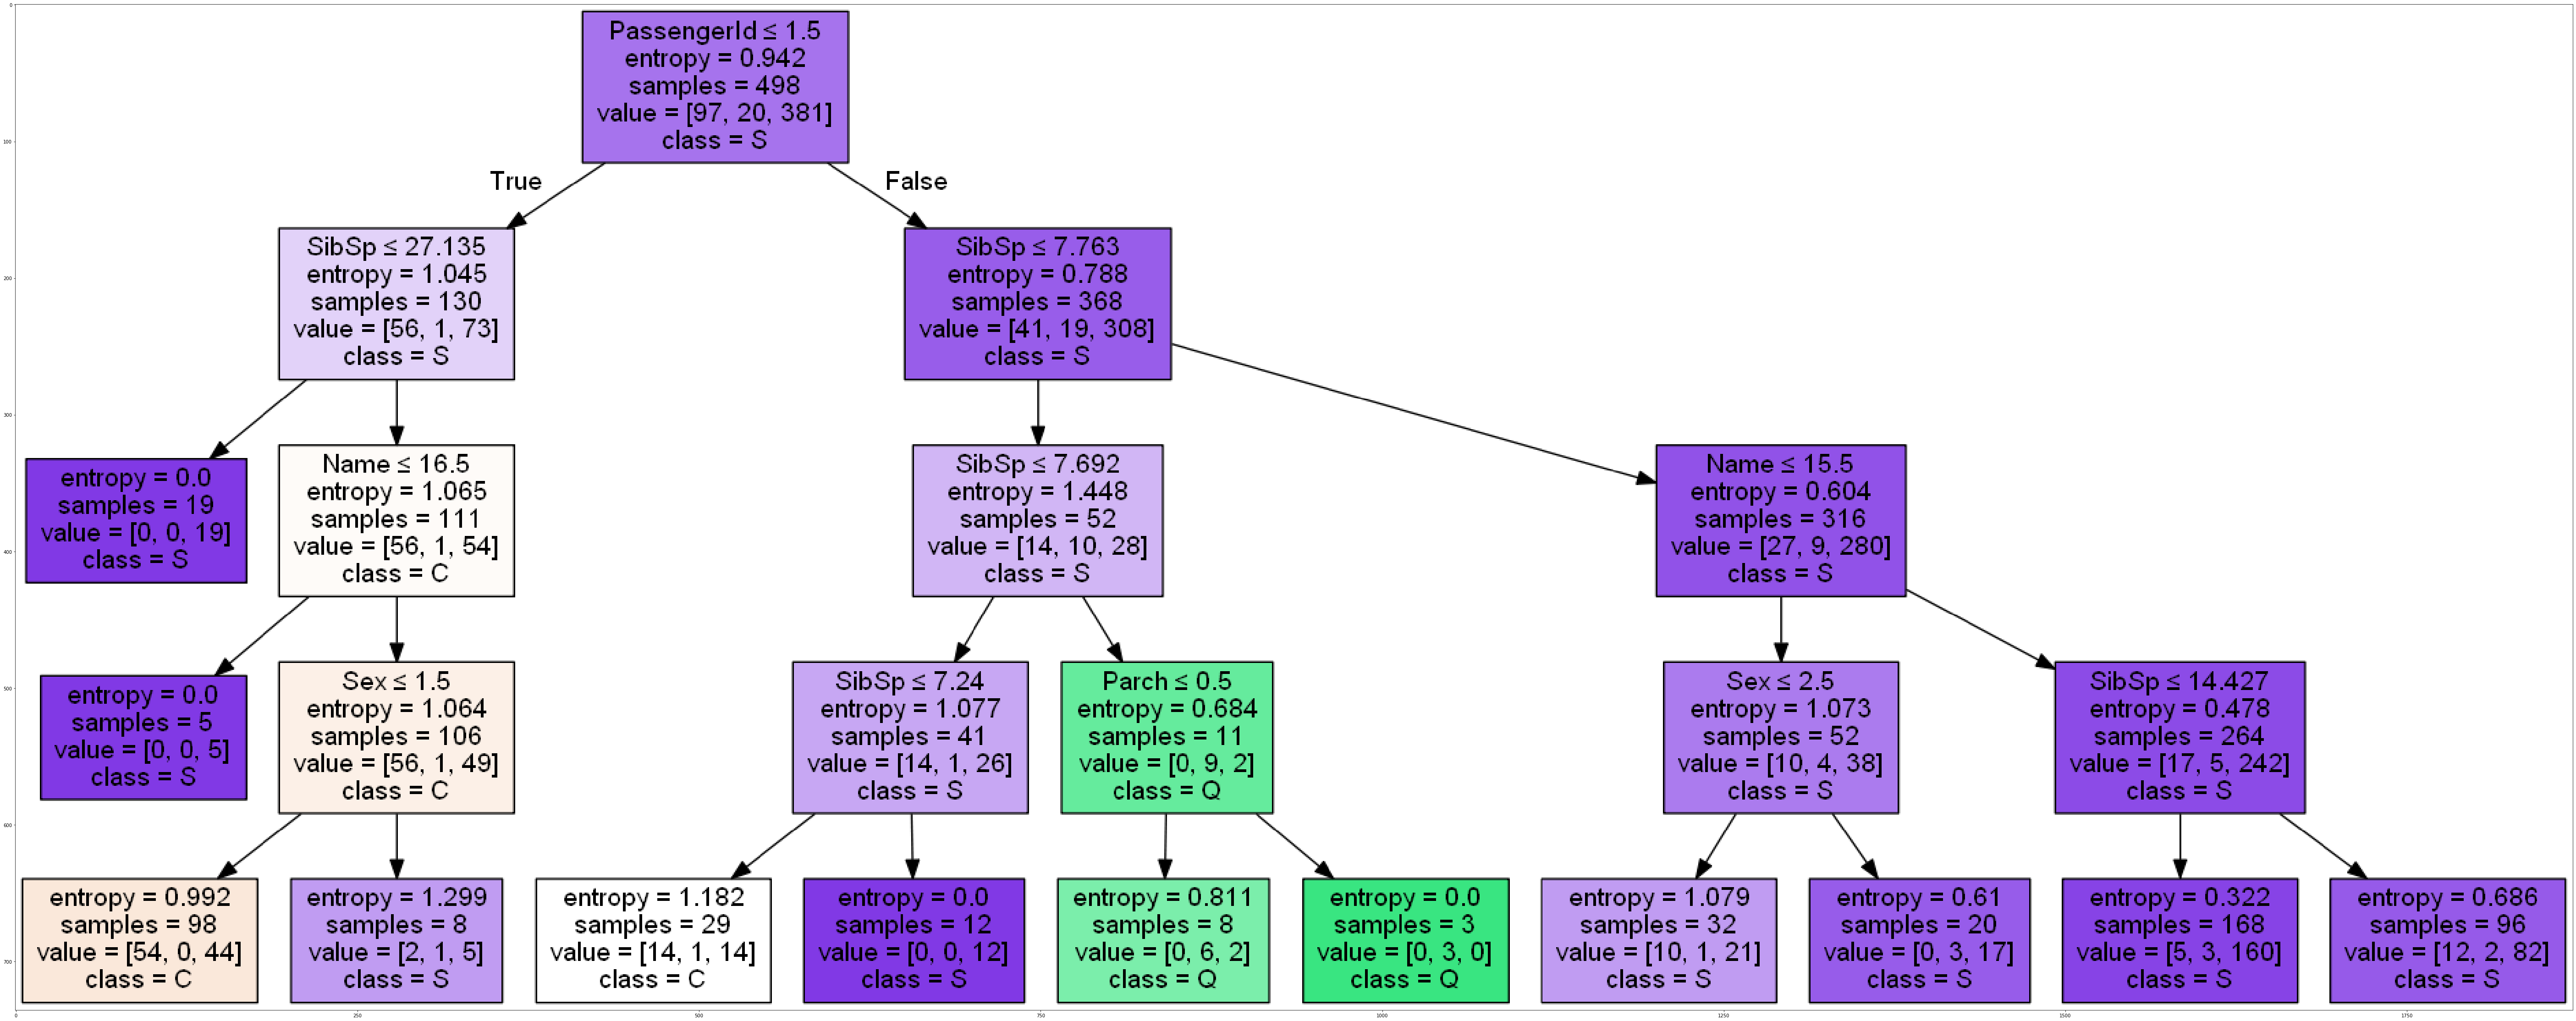

In [25]:
dot_data = StringIO()
filename = "EmbarkedTree.png"
featureNames = df.columns[0:7]
targetNames = df["Embarked"].unique().tolist()
out=tree.export_graphviz(EmbarkedTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')